Reference: 
[https://github.com/jakevdp/PythonDataScienceHandbook]

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

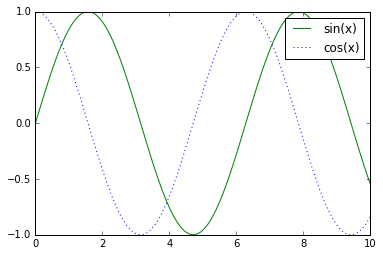

In [10]:
%matplotlib inline

import numpy as np

x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.legend()


In [11]:

fig.savefig('first_fig.png')

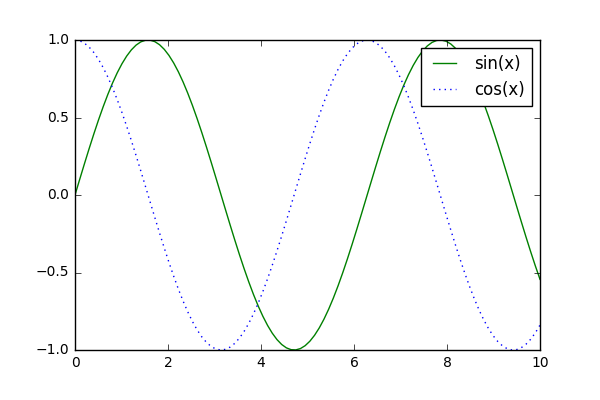

In [12]:
from IPython.display import Image
Image('first_fig.png')

### MATLAB-style Interface

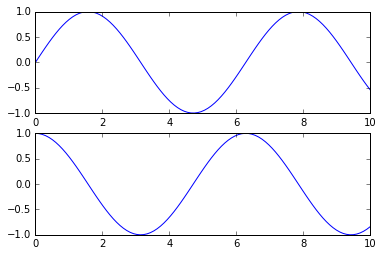

In [13]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object-oriented interface

  Axis is the coordinate x-y axis of the plot. The axes is the area where the  plot shows up.

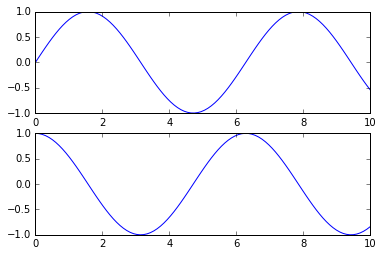

In [14]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

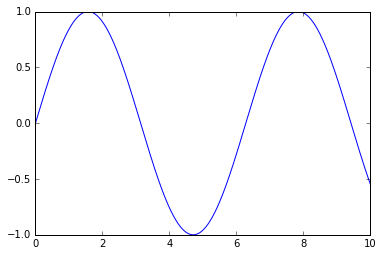

In [15]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

 - plt.xlabel() → ax.set_xlabel()
 - plt.ylabel() → ax.set_ylabel()
 - plt.xlim() → ax.set_xlim()
 - plt.ylim() → ax.set_ylim()
 - plt.title() → ax.set_title()

### Scatterplot

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()


In [17]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

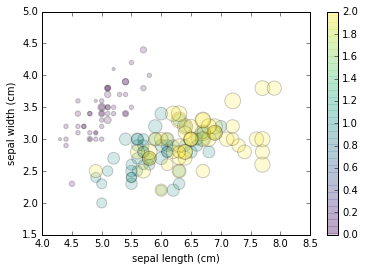

In [21]:
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.2,               # cmap : Colormap,
            s=100*features[3], c=iris.target, cmap='viridis')  # s: The marker size in points**2. # c : color
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar()


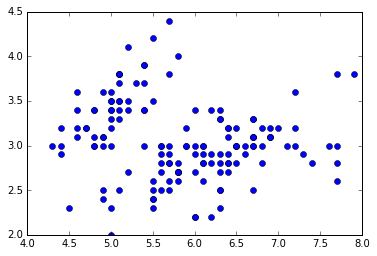

In [28]:
plt.plot(iris.data[:,0], iris.data[:,1], 'bo')

plt.plot should be preferred over plt.scatter for large datasets for performance reasons

### Histogram

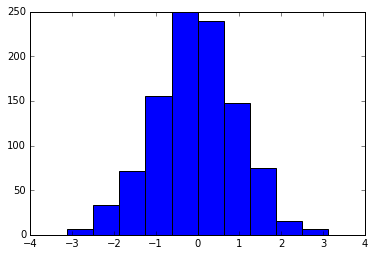

In [29]:
x = np.random.randn(1000) # mu =0.  sigma = 1

plt.hist(x);   # uni-variate Gaussian

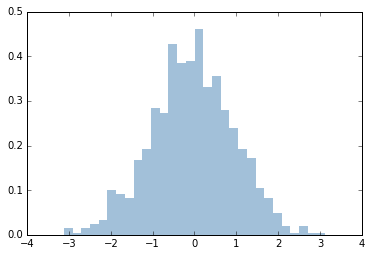

In [30]:
plt.hist(x, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

<img src= "https://i.stack.imgur.com/oXbxu.jpg">

In [31]:
# Multivariate Gaussian and 2-D histogram
mean = [0, 0]
cov = [[1, 1], [1, 2]]  # Covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T

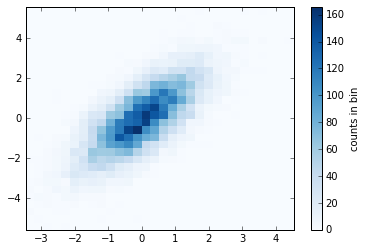

In [32]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

<img src= "https://cookierobotics.com/007/example_same_diagonals.png" >

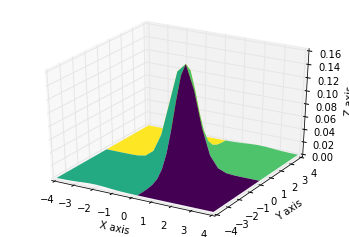

In [42]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-4,4,20)
y = np.linspace(-4,4,20)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

from scipy.stats import multivariate_normal
rv = multivariate_normal(mean, cov)

#3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


<img src= "https://upload.wikimedia.org/wikipedia/commons/5/57/Multivariate_Gaussian.png" >

### Visualization with Seaborn


In [43]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
# Histograms
import pandas as pd
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data[0:10, :]


array([[-2.77438429, -0.8101511 ],
       [ 0.4088258 ,  0.30664974],
       [-0.49774856, -0.57706787],
       [-2.31328891, -2.62691822],
       [-3.51295183, -2.88006034],
       [ 2.29079373,  2.62812931],
       [-2.64752325, -0.63369752],
       [-0.88689021, -0.24830484],
       [ 0.70561774, -1.22998366],
       [ 1.03880592, -0.92899841]])

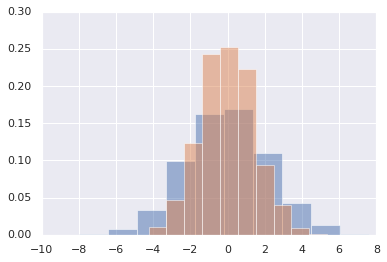

In [45]:
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

In [46]:
data['x'].max()

7.598694876722337

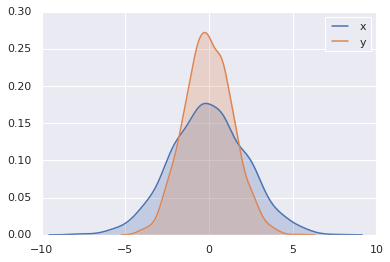

In [47]:
# Kernel Density Estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

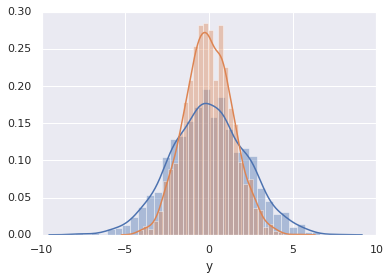

In [48]:
# Histograms and KDE can be combined using distplot:
sns.distplot(data['x'])
sns.distplot(data['y']);

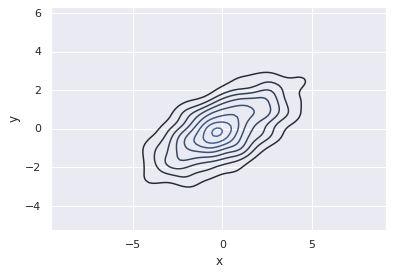

In [49]:
# If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:
sns.kdeplot(data['x'], data['y']);

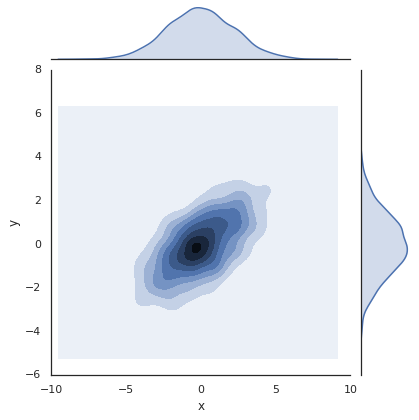

In [50]:
#  joint distribution and the marginal distributions together using sns.jointplot
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

### Pair plots

In [ ]:
# Explore correlations between multidimensional data,
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


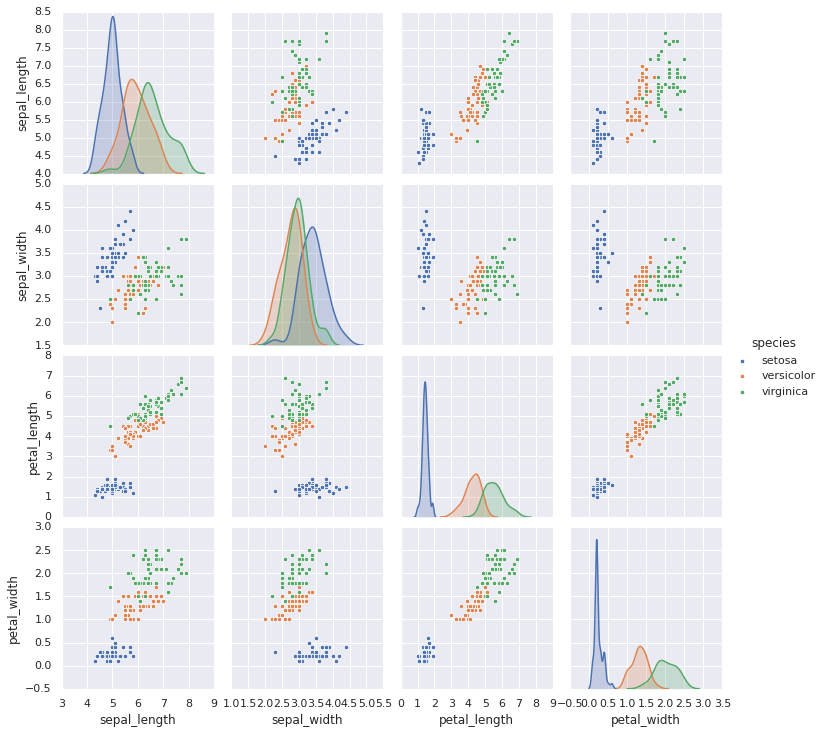

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

In [ ]:
# Restaurant tips
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

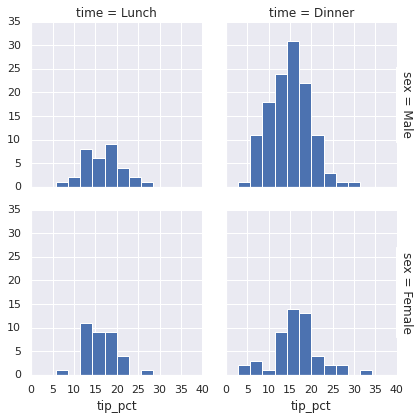

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor Plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


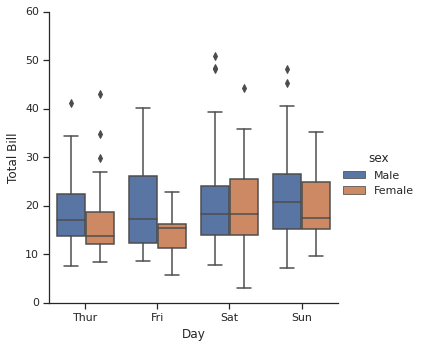

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Bar plots

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


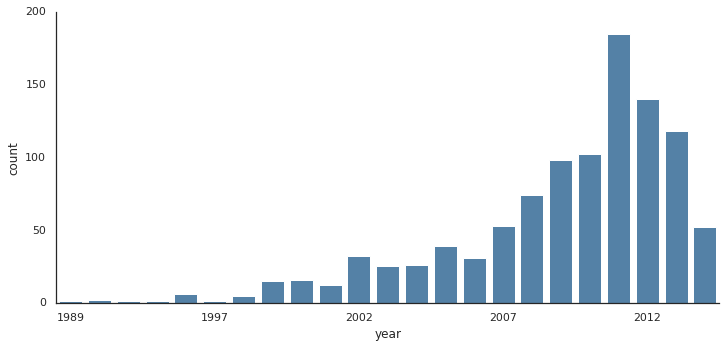

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


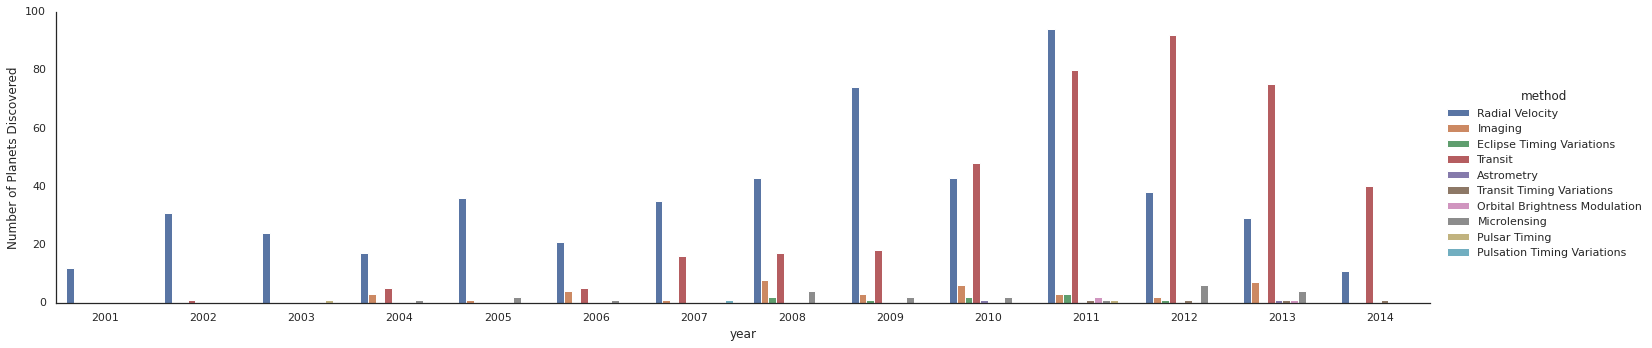

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')